### Msc Data Science & AI  
### IS71068B/A: DATA PROGRAMMING (2023-24)- Exploratory Data Analysis


The assignment is to produce a proposal for a project of your choosing. This includes defining some aims and objectives of your project, acquiring and utilising a range of programming techniques to ensure that your data is suitable for analysis. You will rely on critical, analytical skills to explore your dataset through some exploratory data analysis steps and to identify some of the key challenges of working with said data.

### I. Introduction

Cataract is a common eye condition, in which the lens becomes progressively opaque, resulting in blurred vision.[1]
Cataract surgery is the most frequently performed surgical procedure in the UK, with around 472,000 operations funded by the NHS in England and Wales during the 2018–2019 national cataract audit year. [2]
The procdedure is to remove the lens of the eye, and replace it with an artificial lens. While the cataract surgery is considered a safe, routine procedure, it has potential risks factors. The complications can range from mild discomfort, to vision loss. <br>
The cataract audit allows quality improvement to take place where it will be most helpful and will improve outcomes for patients. 
The data soucred in for this analysis is the National Cataract Audit corresponding to the 2021 NHS year (01/04/2021 to 31/03/2022).
The dataset used in this Exploratory Data Analysis is the sixth prospective year.

### II. Aims and objectives

The aim of using the cataract audit dataset is to identify statistical values, correlations and patterns in the dataset. The dataset consists of 159 NHS Trusts and information about the performance of the clinical procedures to outline a possible fall in the quality, which results in vision loss or complications during the surgery. The complexity of the dataset enables the demonstration of a critical exploratory analysis. The proposal intends to use various data analysis techniques. The primary objective of the research is to identify possible patterns for the cause of surgical complications.


!!! CREATE a requirements.txt file

In [82]:
# Library Imports
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

import pandas as pd
import numpy as np

from urllib.request import urlopen
from bs4 import BeautifulSoup
from IPython import display
from urllib.request import urlopen

import os
import requests

In [83]:
!pip install openpyxl


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [84]:
import matplotlib
import pandas
import numpy
import bs4  
import IPython
import requests

print("matplotlib:", matplotlib.__version__)
print("pandas:", pandas.__version__)
print("numpy:", numpy.__version__)
print("BeautifulSoup (bs4):", bs4.__version__)
print("IPython:", IPython.__version__)
print("requests:", requests.__version__)


matplotlib: 3.6.2
pandas: 1.5.2
numpy: 1.23.5
BeautifulSoup (bs4): 4.11.1
IPython: 8.7.0
requests: 2.28.1


In [85]:
import sys
print("Python:", sys.version)


Python: 3.9.15 (main, Nov 24 2022, 08:29:02) 
[Clang 14.0.6 ]


In [86]:
%matplotlib inline
# this is to display plots in the notebook in line

### III. Web Scraping

##### Openig the URL and crating the BeautifulSoup object

In [87]:
html = urlopen('https://www.data.gov.uk/dataset/2969c9c5-563e-41a3-a1c8-2b8424dd9684/rcophth-nod-national-cataract-audit-year-6-data')
bs = BeautifulSoup(html, "html.parser") 

#### Findig all tables on the URL

In [88]:
tableHead = bs.find_all('table') 
print([th for th in tableHead]) 

[<table class="govuk-table govuk-!-margin-bottom-4">
<thead class="govuk-table__head">
<tr class="govuk-table__row">
<th class="govuk-table__header" scope="col">Link to the data</th>
<th class="govuk-table__header" scope="col">Format</th>
<th class="govuk-table__header" scope="col">File added</th>
<th class="govuk-table__header" scope="col">Data preview</th>
</tr>
</thead>
<tbody class="govuk-table__body">
<tr class="js-datafile-visible govuk-table__row">
<td class="govuk-table__cell">
<a class="govuk-link" data-ga-event="download" data-ga-format="CSV" data-ga-publisher="royal-college-of-ophthalmologists" href="https://nodaudit.org.uk/sites/default/files/2023-08/National%20cataract%20audit%20year%206%20data.csv">
<span class="visually-hidden">Download </span>
                RCOphth NOD National Cataract Audit Year 6 data
                <span class="visually-hidden">, Format: CSV, Dataset: RCOphth NOD National Cataract Audit Year 6 data</span>
</a> </td>
<td class="govuk-table__cell">

#### Finding all the links on the URL

In [89]:
for link in bs.find_all('a'): 
    print(link.attrs['href'])

/cookies
/cookies
/cookies
#main-content
/
/publishers
https://guidance.data.gov.uk/publish_and_manage_data/
/support
http://www.smartsurvey.co.uk/s/3SEXD/
/
http://www.nodaudit.org.uk
/search?filters%5Bpublisher%5D=Royal+College+of+Ophthalmologists
/dataset/087782ab-d1c5-4af1-8c47-7117eeba3710/rcophth-nod-national-cataract-audit-year-4-data
/dataset/15222481-3d1f-4b15-88b1-35792987de1c/rcophth-nod-national-cataract-audit-year-5-data
/dataset/9ca86ea9-1d8a-4573-90ea-fe4ad6a7e36c/national-cataract-audit-year-3-data
/dataset/3c50a70d-671f-44e1-b26d-74f72c3c5de7/national-cataract-audit-year-2-data
https://nodaudit.org.uk/sites/default/files/2023-08/National%20cataract%20audit%20year%206%20data.csv
/dataset/2969c9c5-563e-41a3-a1c8-2b8424dd9684/rcophth-nod-national-cataract-audit-year-6-data/datafile/0a06b11b-3513-48ab-a488-116c3af53708/preview
https://nodaudit.org.uk/sites/default/files/2023-08/Data%20description%20for%20the%20national%20cataract%20audit%20year%206%20data_0.xlsx
https://no

#### Downloading the dataset

In [90]:
for link in bs.find_all('a'):
    if 'href' in link.attrs:
        if link.attrs['href'].endswith('.csv'):
            print(link.attrs['href'])
            csv_url = link.attrs['href']

            local_directory = os.getcwd() # get current working directory
            filename = os.path.join(local_directory, "data", "National cataract audit year 6 data.csv")

            if os.path.exists(filename): # check if file already exists
                print(f"The file {filename} already exists in the path: {local_directory}.")
                continue
        
            response = requests.get(csv_url)

            if response.status_code == 200: # = OK HTML Status
                with open(filename, 'wb') as csv_file: # binary mode as data as tabular
                    csv_file.write(response.content)
                data = pd.read_csv(filename)

            else:
                print(f"Failed to download {csv_url}. Status code: {response.status_code}")

https://nodaudit.org.uk/sites/default/files/2023-08/National%20cataract%20audit%20year%206%20data.csv
The file /Users/sandorkanda/Desktop/MSc/DP_CW1/DP_CW1_EDA/data/National cataract audit year 6 data.csv already exists in the path: /Users/sandorkanda/Desktop/MSc/DP_CW1/DP_CW1_EDA.


#### Web Scraping Conclusion

The dataset was downloaded from a public domain. In a reverse engineering way, the author aimed to demonstrate some of the web scraping techniques taught in the Data Programming labs. The data file in Comma Separated Value (CSV) format was accessed via the links on the webpage and further filtered to look out for a CSV file. The file, once found, was downloaded to the same directory where this Jupyter Notebook file is located, in the data folder in binary mode, as the data file does not consist of anything other than string or numerical values.

### IV. Data Ethics


Source: https://www.data.gov.uk/dataset/2969c9c5-563e-41a3-a1c8-2b8424dd9684/rcophth-nod-national-cataract-audit-year-6-data<br>
The Royal College of Ophthalmologists published the National Cataract Audit data acquired from the data.gov.uk domain, and was last updated on 09 August 2023. The topic is classified as Health Licence.

The Licensor grants a worldwide, royalty-free, perpetual, non-exclusive licence to use the information subject to the conditions.
This licence does not affect the freedom under fair dealing or fair use or any other copyright or database right exceptions and limitations.

The data contains public sector information licensed under the Open Government Licence (OGL) v3.0. The OGL does not cover the use of personal data. There is no need to register or apply to use the OGL. Users need to ensure that their use of information complies with OGL terms. [3] The dataset does not consist of personally identifiable information, nor can the grouping of the columns identify any individuals because the data focuses on the quality of the contributing NHS centres. It is impossible to aggregate or group the data to find identifiable information on this dataset.  

In [91]:
data = pd.read_csv(filename)

### V. Dataset Inspection

In [92]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   TrustName                        159 non-null    object 
 1   ODSCode                          159 non-null    object 
 2   Country                          159 non-null    object 
 3   CentreType                       159 non-null    object 
 4   ISTCLocation                     82 non-null     object 
 5   CentreNumber                     159 non-null    int64  
 6   NumberHESOperations              144 non-null    float64
 7   TimeFraction                     159 non-null    float64
 8   NumberOperationsCA               159 non-null    int64  
 9   CaseAscertainment                144 non-null    float64
 10  NumberEligibleOperations         159 non-null    int64  
 11  NumberOfSurgeons                 159 non-null    int64  
 12  PercentageOperationsCo

### Data Types


In [93]:
pd.set_option('display.max_colwidth', None)

dataTypes = {
    "Variable Type": ["int64", 
                      "float64", 
                      "object"],
                      
    "Description": ["A 64-bit signed integer", 
                    "Python float values are represented as 64-bit double-precision values", 
                    "The data actually stored in object arrays are references to Python objects, not the objects themselves"]
}

#float64:" https://www.simplilearn.com/tutorials/python-tutorial/float-in-python#:~:text=Python%20float%20values%20are%20represented,with%20string%20inf%20(infinity)."
# object: https://numpy.org/devdocs/reference/arrays.scalars.html#numpy.object_
dt = pd.DataFrame(dataTypes)
dt

,Variable Type,Description
0,int64,A 64-bit signed integer
1,float64,Python float values are represented as 64-bit double-precision values
2,object,"The data actually stored in object arrays are references to Python objects, not the objects themselves"


In [94]:
data.shape

(159, 44)

In [95]:
data.describe()

,CentreNumber,NumberHESOperations,TimeFraction,NumberOperationsCA,CaseAscertainment,NumberEligibleOperations,NumberOfSurgeons,PercentageOperationsConsultant,PercentageOperationsCareer,PercentageOperationsExperienced,...,NumberOpsEligiblePostOpVA,PercentageOpsWithPostOpVA,Q1PostOperativeVA,MedianPostOperativeVA,Q3PostOperativeVA,PercentageOpsChangeVAData,NumberOpsEligibleVALoss,UnadjustedVALossRate,CaseComplexityIndexVALoss,AdjustedVALossRate
count,159.000000,144.000000,159.000000,159.000000,144.000000,159.000000,159.000000,159.000000,159.000000,159.000000,...,159.000000,157.000000,146.000000,146.000000,146.000000,157.000000,89.000000,89.000000,89.000000,89.000000
mean,98.584906,2516.726875,0.927630,2384.553459,93.775000,2276.213836,20.874214,81.930189,6.743396,10.048428,...,1836.069182,65.987898,0.009041,0.083151,0.191370,59.943312,1582.831461,0.503596,1.047079,0.447191
std,55.392764,2144.696563,0.183001,2147.955583,16.080482,1935.993120,22.311018,22.692272,15.244790,15.518033,...,1622.750182,27.352728,0.033329,0.067290,0.085667,27.695874,1619.128302,0.356129,0.275245,0.315036
min,1.000000,86.589040,0.073973,91.000000,15.200000,91.000000,1.000000,1.100000,0.000000,0.000000,...,0.000000,0.000000,-0.100000,-0.060000,0.000000,0.000000,65.000000,0.000000,0.540000,0.000000
25%,48.500000,1248.630250,1.000000,1116.500000,97.350000,1071.000000,8.000000,66.400000,0.000000,0.000000,...,821.000000,53.800000,0.000000,0.000000,0.100000,44.400000,601.000000,0.240000,0.850000,0.230000
50%,101.000000,2167.500000,1.000000,2051.000000,100.000000,1922.000000,16.000000,97.700000,0.000000,0.000000,...,1449.000000,73.500000,0.000000,0.100000,0.200000,63.800000,1096.000000,0.430000,0.990000,0.420000
75%,146.500000,3322.698500,1.000000,3245.000000,100.000000,3095.000000,25.000000,100.000000,5.550000,16.800000,...,2531.000000,87.100000,0.000000,0.100000,0.200000,84.300000,2217.000000,0.700000,1.230000,0.640000
max,188.000000,19000.000000,1.000000,21037.000000,100.000000,17497.000000,224.000000,100.000000,98.900000,60.200000,...,14590.000000,99.200000,0.200000,0.220000,0.600000,96.400000,12596.000000,1.580000,1.940000,1.490000


#### Variable description

In [96]:

description = pd.read_csv('data/description.csv')
description.head(10) # first 10 rows to not to clutter the notebook

,Variable name,Variable description
0,TrustName,The name of the contributing centre.
1,ODSCode,"The NHS digital Organisation Data Service (ODS) code for the participating NHS Trust or Independent Sector Treatment Centre, or DHCW code for Welsh health boards."
2,Country,Country or Crown Dependency where the participating centre is located.
3,CentreType,Country or Crown Dependency where the participating centre is located.
4,ITCLocation,The Independent Sector Treatment Centre location. This applies to 7 Independent Treatment Centre organisations who have supplied data.
5,CentreNumber,The number allocated to each centre in the results published in RCOphth NOD reports.
6,NumberHESOperations,The number of cataract operations using phacoemulsification reported to NHS digital or DHCW. Some centres supplied more cataract operations to the audit than they reported to NHS digital or DHCW. Thirteen centres had no data present in the file received from NHS Digital and two centres do not report to either NHS Digital or DHCW.
7,TimeFraction,The fraction of the year used for case ascertainment. Not all centres had access to electronic data collection systems for the complete audit year. A fraction of the year calculated from the first date of cataract surgery was used to obtain a better estimate of case ascertainment.
8,NumberOperationsCA,The number of cataract operations performed using phacoemulsification supplied to the audit by a participating centre.
9,CaseAscertainment,"Estimate of case ascertainment, the number of submitted operations using phacoemulsification divided by the number of operations reported to NHS digital or DHCW."


#### Histograms of the full cataract audit data set

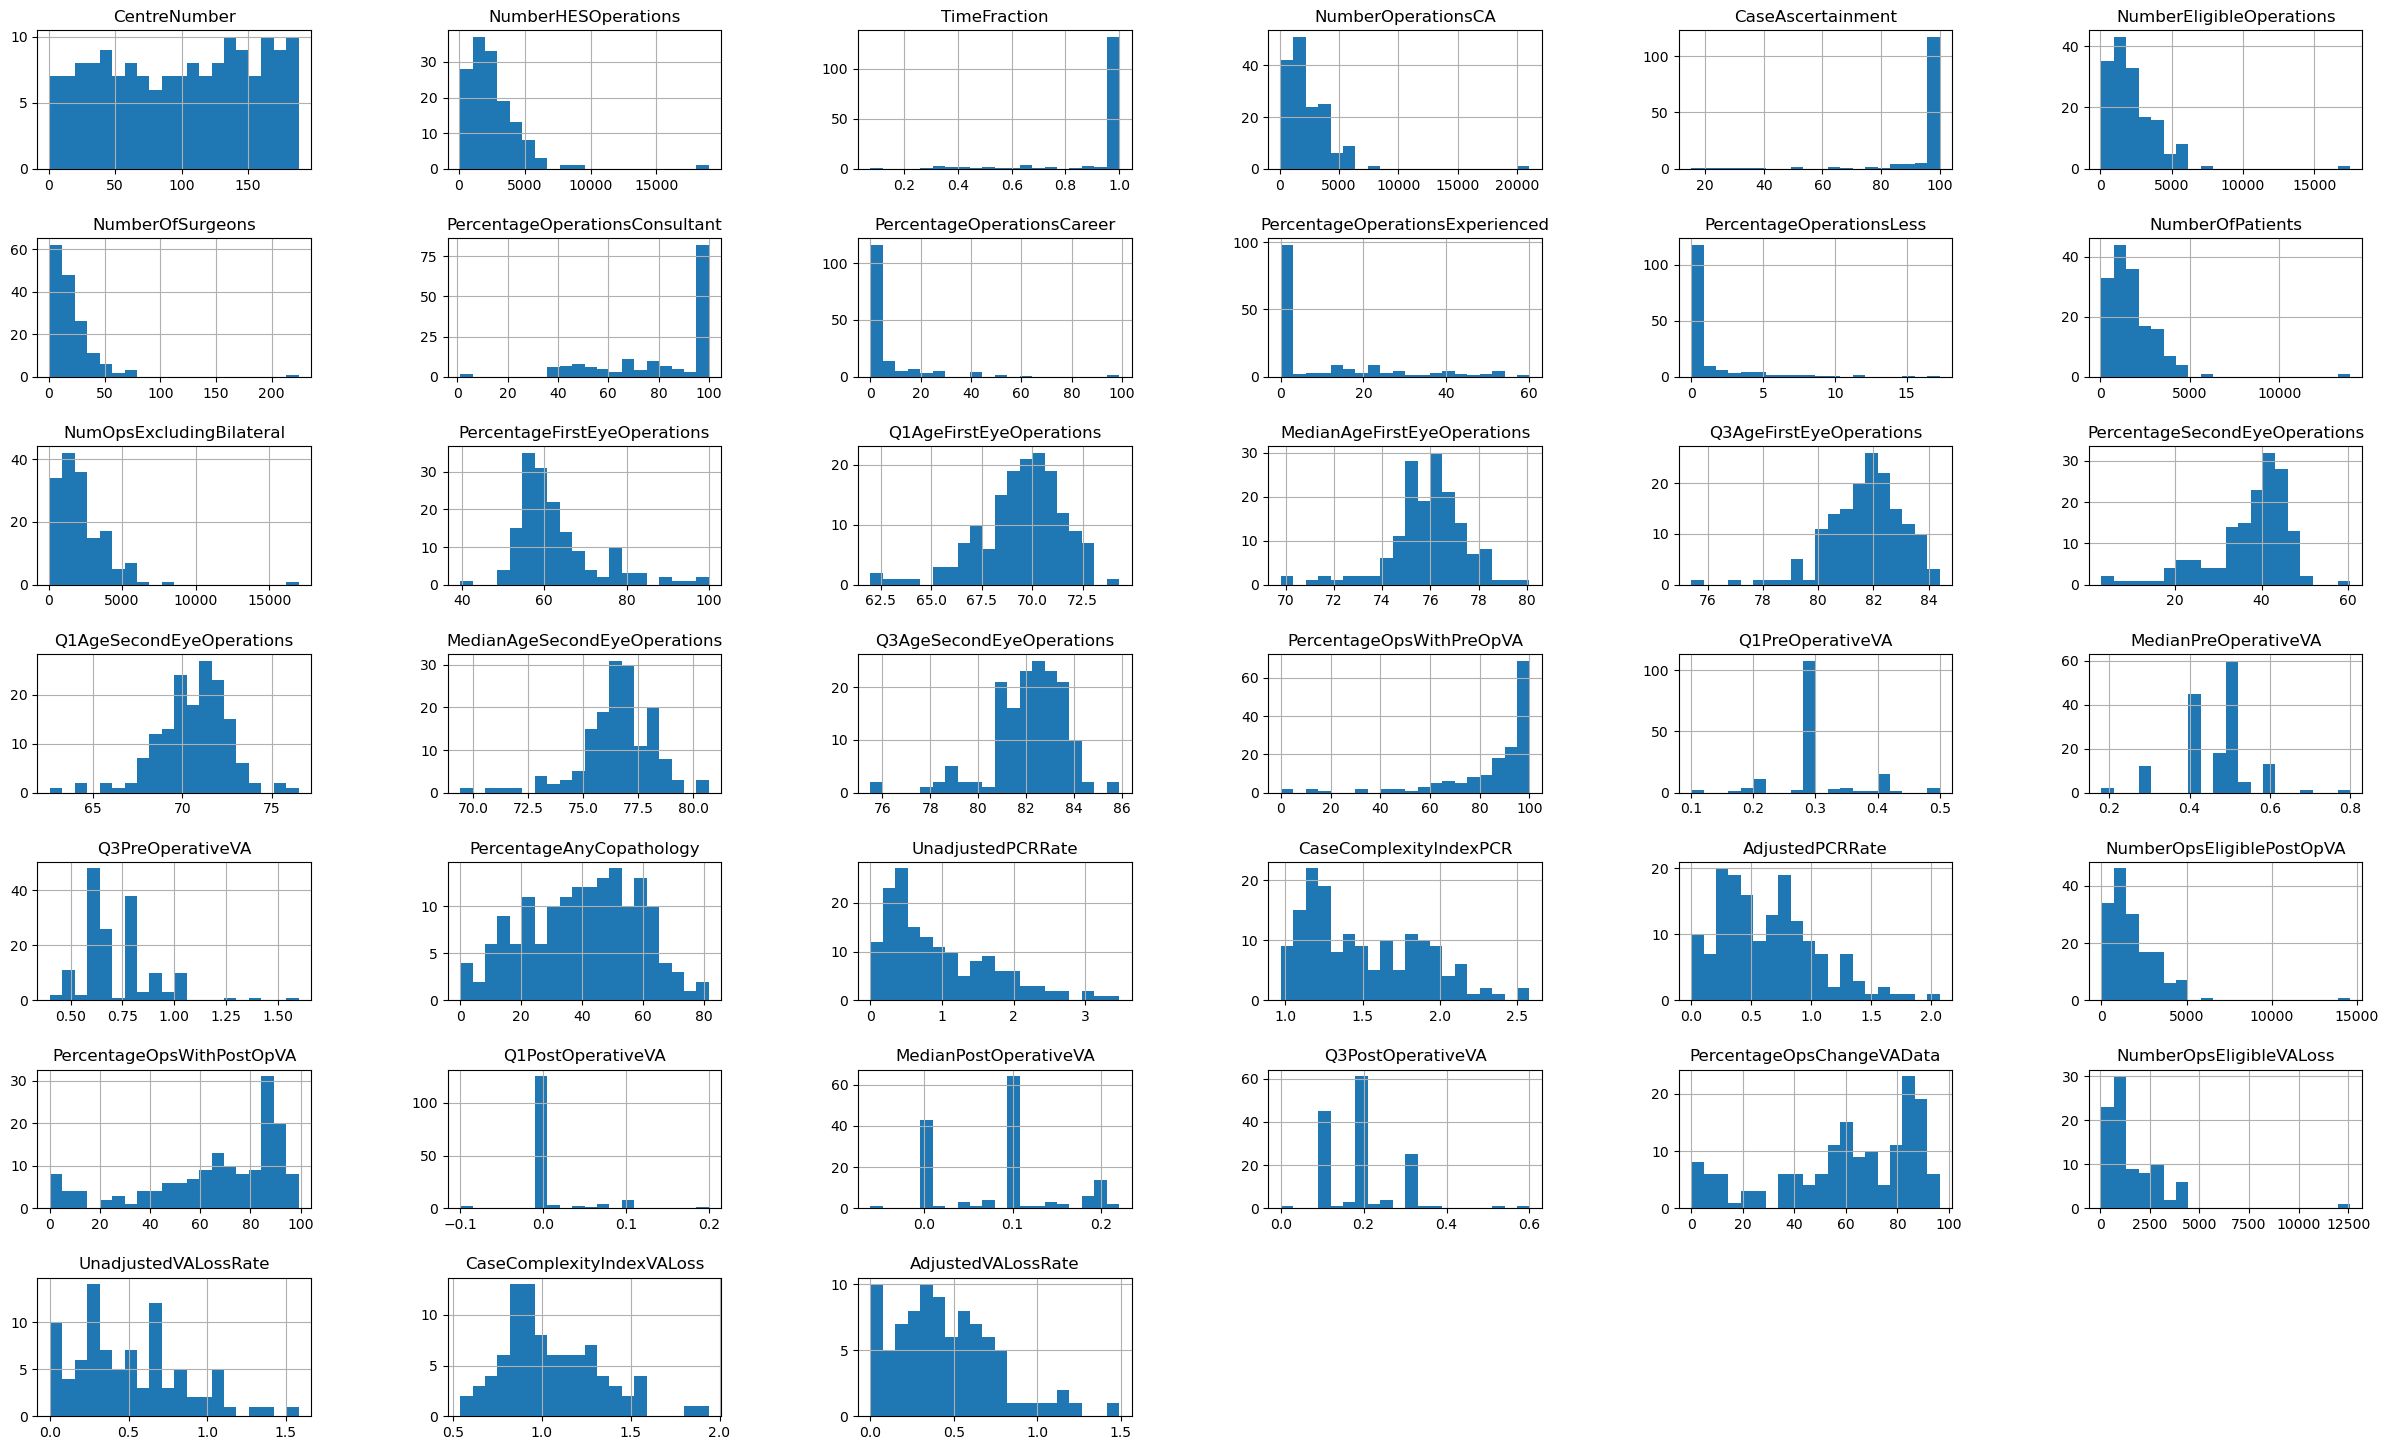

In [97]:
data.hist(bins=20, figsize=(30,18))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

#### Full Dataset Histgram Analysis

In [98]:
hist_analysis = pd.read_csv('data/hist_distribution.csv')
hist_analysis.replace(np.nan, '', inplace=True) # replace NaN with empty string
hist_analysis

,"Left-Skewed, Unimodal","Right-Skewed, Unimodal",Bimodal,Centered Peaks
0,AdjustedVALossRate,PercentageOpsChangeVAData,CaseAscertainment,AdjustedPCRRate
1,CentreNumber,PercentageOpsWithPreOpVA,PercentageOpsWithPostOpVA,CaseComplexityIndexPCR
2,MedianPostOperativeVA,TimeFraction,,MedianAgeFirstEyeOperations
3,MedianPreOperativeVA,,,MedianAgeSecondEyeOperations
4,NumberHESOperations,,,Q1AgeFirstEyeOperations
5,NumberOfEligibleOperations,,,Q3AgeFirstEyeOperations
6,NumberOfPatients,,,Q3AgeSecondEyeOperations
7,NumberOfSurgeons,,,
8,NumberOperationsCA,,,
9,NumberOpsEligiblePostOpVA,,,


#### Dataset Components

The extensive columns can be broken down to the following componenets:
-   Location information
-   Operational metrics
-   Surgery quality metrics
-   Surgeon experience metrics
-   Deidentified Patient Metrics 

### Looking for missing values in the dataset

In [99]:
print(data.isnull().sum())

TrustName                           0
ODSCode                             0
Country                             0
CentreType                          0
ISTCLocation                       77
CentreNumber                        0
NumberHESOperations                15
TimeFraction                        0
NumberOperationsCA                  0
CaseAscertainment                  15
NumberEligibleOperations            0
NumberOfSurgeons                    0
PercentageOperationsConsultant      0
PercentageOperationsCareer          0
PercentageOperationsExperienced     0
PercentageOperationsLess            0
NumberOfPatients                    0
NumOpsExcludingBilateral            0
PercentageFirstEyeOperations        0
Q1AgeFirstEyeOperations             0
MedianAgeFirstEyeOperations         0
Q3AgeFirstEyeOperations             0
PercentageSecondEyeOperations       1
Q1AgeSecondEyeOperations            1
MedianAgeSecondEyeOperations        1
Q3AgeSecondEyeOperations            1
PercentageOp

### Data Cleaning
Having observed the missing values, and their collerations, the conclusion as follows:<br>

 ISTCLocation does not contain numerica data where the values are not numeric, and does not represent value to the analysis, therefore, the column is dropped.



 

In [100]:
data = data.drop("ISTCLocation", axis =1)

 The remaining columns with missing numerical values are imputed with a median fill to preserve the amount of representative data instead of losing nearly half of the data (44%). With a larger dataset, dropping the rows with missing data would be considered. The justification of the imputation type is based on the skewed distribution, and the median is more robust to outliers than the mean imputation.

**Justify** whether median or mean imputation is appropriate- check whether the data is scewed.

In [101]:
data.fillna(data.median(), inplace = True) # fill NaN with median

/var/folders/n6/lht5v8ls6fb4q8rqxgm08l2m0000gn/T/ipykernel_15642/4083364985.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.median(), inplace = True) # fill NaN with median


Checking back whether the missing values are resolved

In [102]:
print(data.isnull().sum())

TrustName                          0
ODSCode                            0
Country                            0
CentreType                         0
CentreNumber                       0
NumberHESOperations                0
TimeFraction                       0
NumberOperationsCA                 0
CaseAscertainment                  0
NumberEligibleOperations           0
NumberOfSurgeons                   0
PercentageOperationsConsultant     0
PercentageOperationsCareer         0
PercentageOperationsExperienced    0
PercentageOperationsLess           0
NumberOfPatients                   0
NumOpsExcludingBilateral           0
PercentageFirstEyeOperations       0
Q1AgeFirstEyeOperations            0
MedianAgeFirstEyeOperations        0
Q3AgeFirstEyeOperations            0
PercentageSecondEyeOperations      0
Q1AgeSecondEyeOperations           0
MedianAgeSecondEyeOperations       0
Q3AgeSecondEyeOperations           0
PercentageOpsWithPreOpVA           0
Q1PreOperativeVA                   0
M

#### Conclusion on the Data Inspection


The dataset consists of 44 features and 159 rows of data, with the most numerical data type of float64 and the rest with int64. The non-numeric data is represented as an 'object' data type.

The print(data.isnull().sum()) command printed out the sum of missing values of each feature. The most significant missing data was present in the 'ISTCLocation' column, which is the location of the NHS Trusts. The TrustName column represents the name of the trusts; thus, imputation with meidan values was not a viable option, nor was there any evidence that the ISTCLocation column was required for the data analysis; therefore, this column was dropped.

Several other features with numerical values had missing data, and to keep the dataset optimal for analysis, the median imputation filled the missing numerical values, aligning the dataset for the data visualisation.



### VI. Visualising the data to gain insights

Histogram of the full dataset

Bar Chart of the top twenty Trusts with the highest number of Cataract patients

In [103]:
df_sorted20 = data.sort_values(by='NumberOfPatients', ascending=False).head(20)
df_sorted20 = df_sorted20.iloc[: :-1]  

In [104]:
def horisontal_bar_plot(df_sorted20):

    for i, row in df_sorted20.iterrows():
        print(f"{row['TrustName']}: {row['NumberOfPatients']}")
        
    plt.figure(figsize=(15, 10))
    bars = plt.barh(df_sorted20['TrustName'], df_sorted20['NumberOfPatients']) # horizontal bar plot for better readability
    
    plt.xlabel('Number of Patients', fontsize= 18)
    plt.ylabel('Hospital', fontsize= 18)
    plt.title('The Top 20 Hospitals with the Most Number of Patients', fontsize= 20)
    plt.grid(axis='x', linestyle='--')
    
    for bar in bars:
        width = bar.get_width()
        plt.text(width, bar.get_y() + bar.get_height()/2, f'{(width)}', va='center', fontsize=14) # add value labels to the bars

    plt.tight_layout()
    plt.show()

SPAMEDICA - BIRKENHEAD: 3160
SPAMEDICA - COVENTRY: 3186
NEWMEDICA (IPSWICH): 3218
SPAMEDICA - DERBY: 3273
KING'S COLLEGE HOSPITAL NHS FOUNDATION TRUST: 3309
NEWMEDICA (TEESSIDE): 3350
CHEC (ATRIA WATFORD): 3444
BUCKINGHAMSHIRE HEALTHCARE NHS TRUST: 3579
NEWMEDICA (GLOUCESTER - BRIGHOUSE): 3653
OPTEGRA EYE HEALTH CARE (MANCHESTER EYE HOSPITAL): 3903
SPAMEDICA - WAKEFIELD: 4004
SPAMEDICA - BOLTON: 4121
EAST SUFFOLK AND NORTH ESSEX NHS FOUNDATION TRUST: 4135
SPAMEDICA - BIRMINGHAM: 4192
SPAMEDICA - WOLVERHAMPTON: 4277
SPAMEDICA - MANCHESTER: 4287
SPAMEDICA - CHELMSFORD: 4530
SPAMEDICA - SHEFFIELD: 4604
THE NEWCASTLE UPON TYNE HOSPITALS NHS FOUNDATION TRUST: 6200
MOORFIELDS EYE HOSPITAL NHS FOUNDATION TRUST: 13950


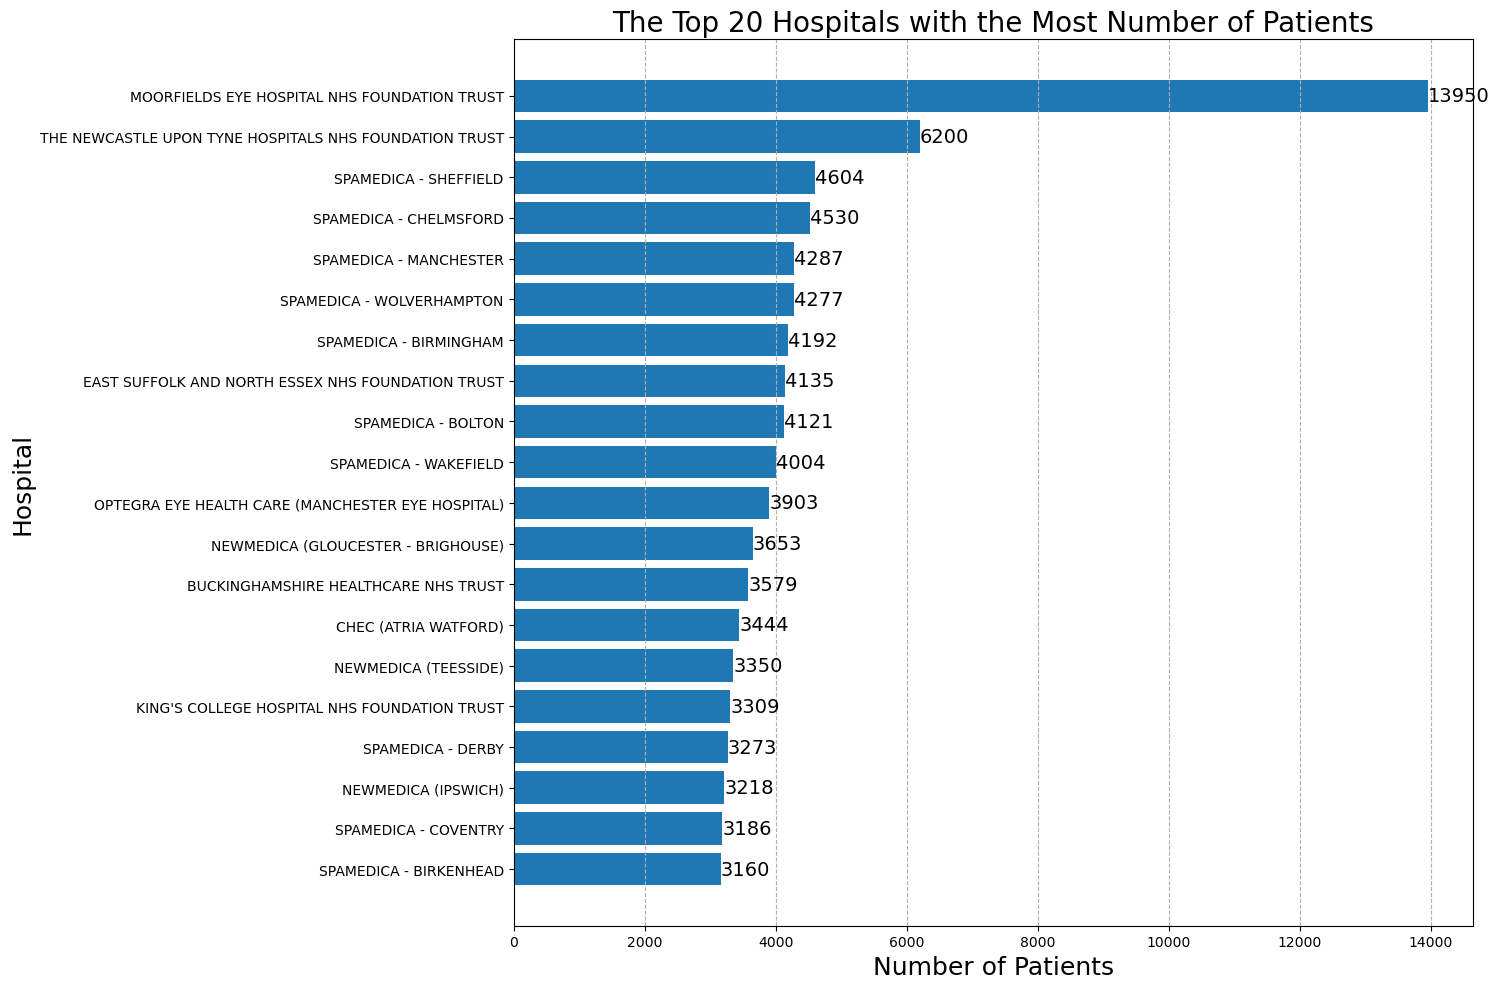

In [105]:
horisontal_bar_plot(df_sorted20)

In [106]:
trust = data['CentreType'].value_counts()
trust

NHS                     75
NHS - ISTC              69
NHS - ISTC & PRIVATE    13
GUERNSEY                 1
PRIVATE                  1
Name: CentreType, dtype: int64

Pie Chart of the percentages of first and second eye operations of all trusts

In [107]:
def pie_chart(data):
    
    percentage_first_eye = data['PercentageFirstEyeOperations'].mean()
    percentage_second_eye = data['PercentageSecondEyeOperations'].mean()

    d = {
        'Category': ['First Eye Operations', 'Second Eye Operations'],
        'Percentage': [percentage_first_eye, percentage_second_eye]
    }

    pc_df = pd.DataFrame(d)
    
    explode = (0, 0.05)
    ax = pc_df.plot.pie(
        y='Percentage',
        labels= pc_df['Category'],
        explode = explode,
        autopct='%1.1f%%',
        startangle=-60,
        counterclock=False,
        colors=cm.Set2([0, 1]),
        wedgeprops={'edgecolor': 'grey'},
        legend= False
    )

    ax.set_title('Surgery distribution on laterality', size =16)
    ax.get_yaxis().set_visible(False)
    plt.tight_layout()
    plt.show()


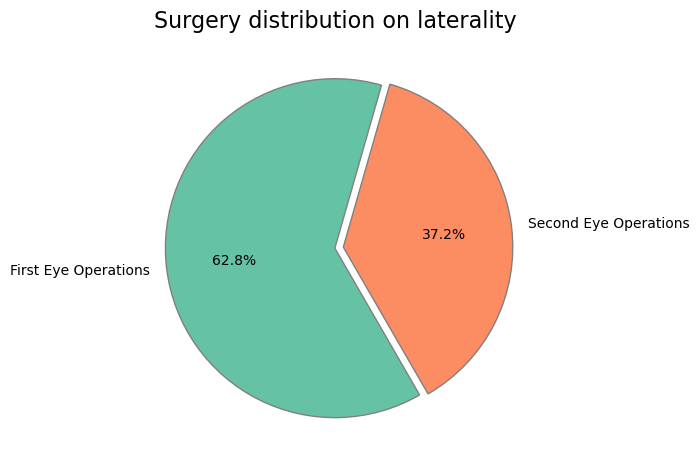

In [108]:
pie_chart(data) 

Box plot of the Median Ages for First vs Second Eye Operations.

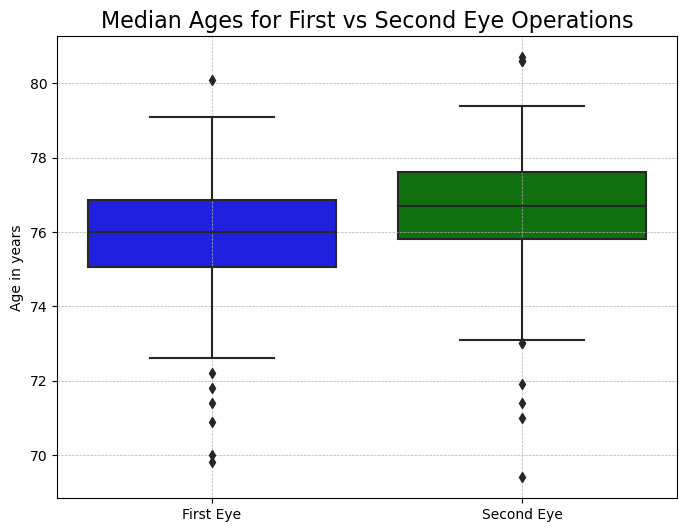

In [109]:
firstEye = data['MedianAgeFirstEyeOperations']
secondEye = data['MedianAgeSecondEyeOperations']

plt.figure(figsize=(8,6))
sns.boxplot(data=[firstEye, secondEye], palette=['blue', 'green'])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)


plt.title('Median Ages for First vs Second Eye Operations', size =16)
plt.xticks([0, 1], ['First Eye', 'Second Eye'])
plt.ylabel('Age in years')
plt.show()

In [110]:
def aggregate_and_print(objects, methods):
    
    for object_name, object_instance in objects.items():
        for method_name in methods:
            method = getattr(object_instance, method_name)
            print(f"{object_name}.{method_name}(): {method()}")

eyes = {
    "firstEye": firstEye,
    "secondEye": secondEye
}

methods = ["min", "max"]

In [111]:
aggregate_and_print(eyes, methods)

firstEye.min(): 69.8
firstEye.max(): 80.1
secondEye.min(): 69.4
secondEye.max(): 80.7


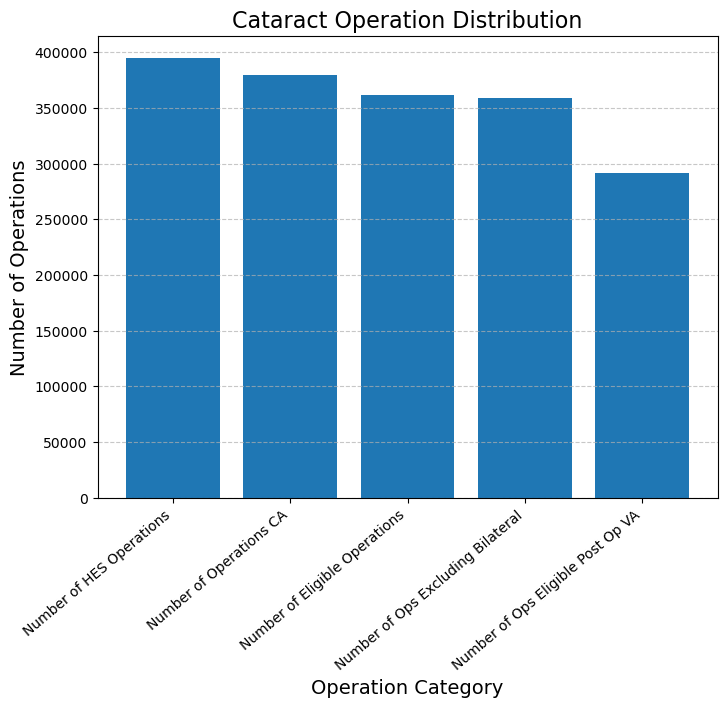

In [112]:
d = [
    data['NumberHESOperations'].sum(), 
    data['NumberOperationsCA'].sum(), 
    data['NumberEligibleOperations'].sum(), 
    data['NumOpsExcludingBilateral'].sum(), 
    data['NumberOpsEligiblePostOpVA'].sum()
]

labels = [
    'Number of HES Operations', 
    'Number of Operations CA', 
    'Number of Eligible Operations', 
    'Number of Ops Excluding Bilateral', 
    'Number of Ops Eligible Post Op VA'
]

fig, ax = plt.subplots(figsize=(8, 6))
plt.title('Cataract Operation Distribution', size= 16)
plt.ylabel('Number of Operations', fontsize= 14)
plt.xlabel('Operation Category', fontsize= 14)
ax.grid(axis='y', alpha=0.7, linestyle='--')

plt.bar(labels, d)
plt.xticks(rotation=40, ha="right") 
plt.show()

#### Surgey Categories- Explained

<html>
<head>
<!-- <style>
    li {
        font-weight: bold;     
        text-decoration: underline; 
    }
</style> -->
</head>
<body>
<ul>
<li>NumberHESOperations</li><p>The number of cataract operations using phacoemulsification reported to NHS digital or DHCW. Some centres supplied more cataract operations to the audit than they reported to NHS digital or DHCW. Thirteen centres had no data present in the file received from NHS Digital and two centres do not report to either NHS Digital or DHCW.</p>
<li>NumberOperationsCA</li><p>The number of cataract operations performed using phacoemulsification supplied to the audit by a participating centre.</p>
<li>NumberEligibleOperations</li><p>The number of eligible cataract operations for each participating centre. For details of eligibility see the RCOphth NOD website (www.nodaudit.org.uk). The audit year was the 2021 NHS year (01/04/2021 to 31/03/2022).</p>
<li>NumberOpsExcludingBilateral</li><p>The number of eligible cataract operations excluding bilateral surgery which are not included in the first and second treated eye results.</p>
<li>NumberOpsEligiblePostOpVA</li><p>The number of cataract operations eligible for postoperative visual acuity results. Note the postoperative visual acuity time period (NHS year) was from 01/04/2021 to 31/01/2022.</p>
</ul>
</body>
</html>

Consultant: 82%
Career Grade: 7%
Experienced: 10%
Less Experienced: 1%


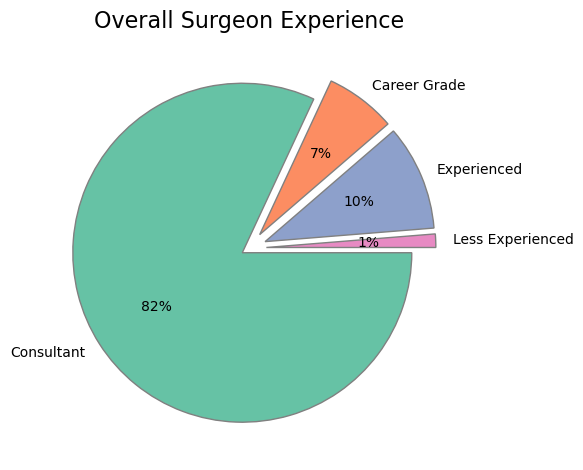

In [113]:
Consultant = data['PercentageOperationsConsultant'].mean()
CareerGrade= data['PercentageOperationsCareer'].mean()
Experienced = data['PercentageOperationsExperienced'].mean()
LessExperienced = data['PercentageOperationsLess'].mean()

d = {
    'Surgeon': ['Consultant', 'Career Grade', 'Experienced', 'Less Experienced'],
    'Percentage': [Consultant, CareerGrade, Experienced, LessExperienced ]
}

explode = (0.05, 0.1, 0.1, 0.1)

df = pd.DataFrame(d)
ax = df.plot.pie(
    y = 'Percentage',
    labels = df['Surgeon'],
    autopct='%1.0f%%',
    explode = explode, 
    startangle=0, 
    counterclock=False, 
    colors=cm.Set2([0,1,2,3]),
    wedgeprops={'edgecolor':'gray'},
    legend = False
)
for i, row in df.iterrows():
    int = round(row['Percentage'])
    print(f"{row['Surgeon']}: {int}%")

ax.get_yaxis().set_visible(False)
ax.set_title('Overall Surgeon Experience', size =16)
plt.tight_layout()
plt.show()


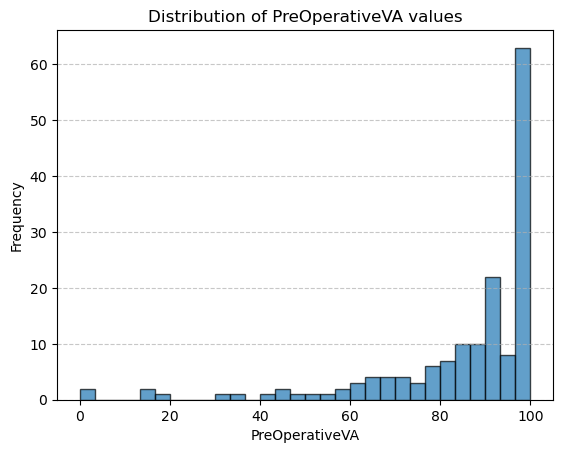

In [114]:
import matplotlib.pyplot as plt

plt.hist(data['PercentageOpsWithPreOpVA'], bins=30, edgecolor='k', alpha=0.7)
plt.title('Distribution of PreOperativeVA values')
plt.xlabel('PreOperativeVA')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.7, linestyle='--')
plt.show()


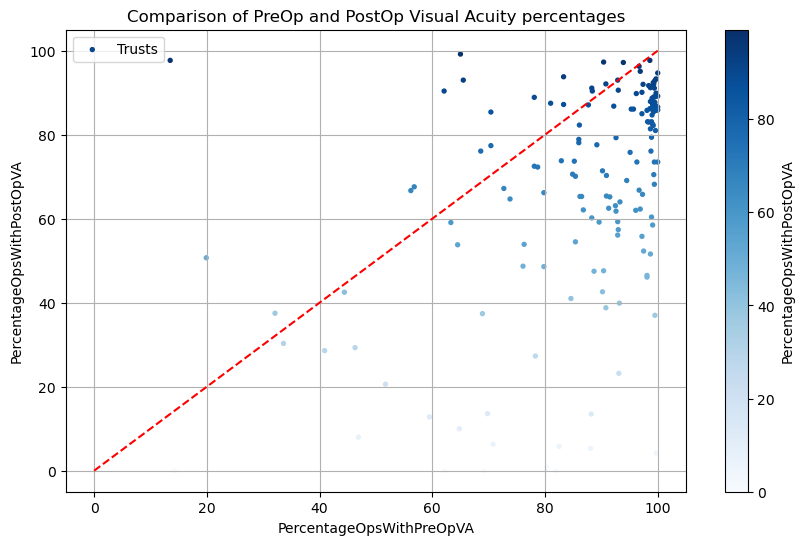

In [115]:
plt.figure(figsize=(10, 6))

# Use PercentageOpsWithPostOpVA as the color determinant
colors = data['PercentageOpsWithPostOpVA']

plt.scatter(data['PercentageOpsWithPreOpVA'], data['PercentageOpsWithPostOpVA'], c=colors, s=8, cmap='Blues', label='Trusts')
plt.colorbar(label='PercentageOpsWithPostOpVA') #
plt.plot([0, 100], [0, 100], color='red', linestyle='--')

plt.xlabel('PercentageOpsWithPreOpVA')
plt.ylabel('PercentageOpsWithPostOpVA')
plt.title('Comparison of PreOp and PostOp Visual Acuity percentages')
plt.legend()
plt.grid(True)
plt.show()


#### Data Visualisation Conclusion

Bar chart/ Horisontal Bar Charts<br>
Pie Charts<br>
Box Plots<br>
Scatter Matrixs<br>

### VII. Data Analysis

In [116]:
def print_aggregated_data(data, agg):
    for column, (label, method) in agg.items(): # iterate over the dictionary
        res = getattr(data[column], method)() # get the method from the column
        print(f"{label}: {res}")

agg = {
    'NumberOfPatients': ('Total Patients', 'sum'),
    'NumberOfSurgeons': ('Total Surgeons', 'sum'),
    'TrustName': ('Total Trusts', 'count'),
    'NumberHESOperations': ('HES Operations', 'sum'),
    'NumberEligibleOperations': ('Eligible Operations', 'sum')

}

print_aggregated_data(data, agg)
print("The percentage of total vs. eligible operations: ", data['NumberEligibleOperations'].sum() / data['NumberOperationsCA'].sum() * 100 , "%")
print("The average number of operations per surgeon: " , data['NumberHESOperations'].sum() / data['NumberOfSurgeons'].sum())


Total Patients: 285531
Total Surgeons: 3319
Total Trusts: 159
HES Operations: 394921.17004
Eligible Operations: 361918
The percentage of total vs. eligible operations:  95.45660751587786 %
The average number of operations per surgeon:  118.98799940946068


In [117]:
total_operations = data['NumberHESOperations'].sum()

country_data = data.groupby('Country')['NumberHESOperations'].sum().reset_index()
country_data['% Of Operations'] = country_data['NumberHESOperations'].apply(lambda x: (x / total_operations) * 100)
country_data = pd.DataFrame(country_data)
country_data



,Country,NumberHESOperations,% Of Operations
0,CYMRU,5589.50000,1.415346
1,ENGLAND,387164.17004,98.035811
2,GUERNSEY,2167.50000,0.548844


UnadjustedPCRRate vs AdjustedPCRRate

### Looking for correlations


In [118]:
correlations = data.corr()
print(correlations)

                                 CentreNumber  NumberHESOperations  \
CentreNumber                         1.000000            -0.236279   
NumberHESOperations                 -0.236279             1.000000   
TimeFraction                        -0.542578             0.267307   
NumberOperationsCA                  -0.237017             0.916854   
CaseAscertainment                    0.051651            -0.095283   
NumberEligibleOperations            -0.199126             0.904058   
NumberOfSurgeons                    -0.507690             0.723954   
PercentageOperationsConsultant       0.496787            -0.191078   
PercentageOperationsCareer          -0.025622            -0.011600   
PercentageOperationsExperienced     -0.623001             0.292107   
PercentageOperationsLess            -0.423184            -0.006095   
NumberOfPatients                    -0.226879             0.910564   
NumOpsExcludingBilateral            -0.203954             0.902232   
PercentageFirstEyeOp

/var/folders/n6/lht5v8ls6fb4q8rqxgm08l2m0000gn/T/ipykernel_15642/1449212874.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corr()


### Correlation calculation over high threshold

In [119]:
corr_matrix = data.corr()
threshold = 0.9
high_corr = [(col, row) for col in corr_matrix.columns
             for row in corr_matrix.index 
             if (abs(corr_matrix[col][row]) > threshold) & (col != row)]

for i in high_corr:
    print(i)

('NumberHESOperations', 'NumberOperationsCA')
('NumberHESOperations', 'NumberEligibleOperations')
('NumberHESOperations', 'NumberOfPatients')
('NumberHESOperations', 'NumOpsExcludingBilateral')
('NumberHESOperations', 'NumberOpsEligiblePostOpVA')
('NumberOperationsCA', 'NumberHESOperations')
('NumberOperationsCA', 'NumberEligibleOperations')
('NumberOperationsCA', 'NumberOfPatients')
('NumberOperationsCA', 'NumOpsExcludingBilateral')
('NumberOperationsCA', 'NumberOpsEligiblePostOpVA')
('NumberEligibleOperations', 'NumberHESOperations')
('NumberEligibleOperations', 'NumberOperationsCA')
('NumberEligibleOperations', 'NumberOfPatients')
('NumberEligibleOperations', 'NumOpsExcludingBilateral')
('NumberEligibleOperations', 'NumberOpsEligiblePostOpVA')
('NumberOfPatients', 'NumberHESOperations')
('NumberOfPatients', 'NumberOperationsCA')
('NumberOfPatients', 'NumberEligibleOperations')
('NumberOfPatients', 'NumOpsExcludingBilateral')
('NumberOfPatients', 'NumberOpsEligiblePostOpVA')
('NumOps

/var/folders/n6/lht5v8ls6fb4q8rqxgm08l2m0000gn/T/ipykernel_15642/3633252549.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


In [120]:
data_quart = data[['Q1AgeFirstEyeOperations', 
                   'Q1AgeSecondEyeOperations', 
                   'Q3AgeFirstEyeOperations', 
                   'Q3AgeSecondEyeOperations'
                   ]].sum()
data_quart

Q1AgeFirstEyeOperations     11039.10
Q1AgeSecondEyeOperations    11226.95
Q3AgeFirstEyeOperations     12988.90
Q3AgeSecondEyeOperations    13062.85
dtype: float64

### VIII. Key Findings- working process


Total Patients: 285531
Total Surgeons: 3319
Total Trusts: 159
HES Operations: 394921.17004
Eligible Operations: 361918
The percentage of total vs. eligible operations:  95.45660751587786 %


Trusts:

MOORFIELDS EYE HOSPITAL NHS FOUNDATION TRUST: 19000= 7% of total patients
Largest 100% diagnostic hospital. Past Covid 19 they prioritised the cataract backlogs, and were the first Trust to introduce the 'Cataract Drive', where 90% of the operating theatres were working on catarct patients only.



<p>Patients</p>

Total Patients: 285531
Total Surgeons: 3319
Total Trusts: 159
HES Operations: 394921.17004
Eligible Operations: 361918
The percentage of total vs. eligible operations:  95.45660751587786 %
The average number of operations per surgeon:  118.98799940946068

	Country	NumberHESOperations	% Of Operations
0	CYMRU	5589.50000	1.415346
1	ENGLAND	387164.17004	98.035811
2	GUERNSEY	2167.50000	0.548844


<ul>
<li>Age</li>
    firsEye.min(): 69.8
firsEye.max(): 80.1
secondEye.min(): 69.4
secondEye.max(): 80.7
<li>Laterality</li>
    first eye= 62.8%
    second eye = 37.2%
<li>Complications</li>
<p>Surgeons</p>
    
    
Consultant: 82%
CareerGrade: 7%
Experienced: 10%
Less Experienced: 1%

</ul>

<p>Surgeries</p>
<ul>
<li>Total Surgeries</li>
<li>Eligible Surgeries</li>
<li>Surgeries resulting Visual Acquity</li>
<li>Surgeries resulting PCR</li>
</ul>


<ul>
<p>Operative complications </p>
<li>Postoperative complications </li>  
<li>Postoperative visual acuity </li>  
<li>Change in visual acuity </li>   
<li><br>
AdjustedVALossRate vs UnadjustedVALossRate<br>
CaseComplexityIndexVALoss vs CaseComplexityIndexPCR<br>
MedianPreOperativeVA vs MedianPostOperativeVA</li>
   

### IX. Discussion/critical analysis.- working process
#### Interspersed with an appropriate level of discussion to show understanding of how and why concepts are used

Has the data fulfilled the purpose of the analysis, any pros/cons of the selected data.

formative, summative evaluation

While in this notebook, the author analyses a single year's data, it has great potential to showcase a meaningful analysis in a transparent, explainable way.

### X. Conclusion and further work. - working process

#### Websrcaping

Accesing the website data using Beautiful Soup library, searched for tables and links, filtered to search for CSV files only. This though, was reverse engineered, as the author was aware of the CSV file on the URL.


Reading and Writing Files on OS with conditions regarding the status code, whether the file exits, and save the file in the currenct working directory.


#### Data Inspection

Learning about the dataset, and the description of the data.

#### Missing Values- Imputation


#### Data Exploration via Data Visualisation


#### Findings


#### Future work

Add further analysis, with the better understanding of the clinical terms
This is a single year analysis, the sixth in the row, which gives an opportunity to compare the dataset with the previous audits, and to find possible patterns in the quality decrease and it is a huge potential to predict future data, once there is a sufficient amount of data becomes available.It will give an opportunity to analyse data from multiple datasources.  Although, this report is obtained from the Royal College of Ophthalmologists, the ethical roadblock may play a vital question about the execution of such AI project.

###  XI. References

[1] https://www.moorfields.nhs.uk/service/cataract- Accessed on 25/10/2023<br>
[2] www.nodaudit.org.uk/resources/publications-annual-report Accessed on 25/10/2023<br>
[3] https://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/ Accessed on 25/10/2023<br>
[4]<br>
[5]<br>
[6]<br>